# Preparando dados

In [331]:
import pandas as pd

In [332]:
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding = 'latin-1')

In [333]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [334]:
clientes = pd.read_excel('dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [335]:
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding = 'latin-1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


## analisando dados

In [336]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [337]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [338]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [339]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [340]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


## analisando dados ausentes

In [341]:
# verifica valores ausentes na base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [342]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [343]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [344]:
#verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


## eliminando dados ausentes

In [345]:
clientes.dropna(subset=['peso'], inplace=True)

In [346]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [347]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

In [348]:
estados.dropna(subset=['pais'], inplace=True)


## alterando por media e mediana

In [20]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [21]:
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [23]:
print(f'média: {media}, mediana:{mediana}')

média: 143.4409594095941, mediana:140.0


In [24]:
round(media, 2)

143.44

In [25]:
clientes.peso.fillna(round(media, 2), inplace=True)


In [27]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [28]:
clientes.count()

id_cliente    547
peso          547
colesterol    547
genero        547
id_estado     547
dtype: int64

## preenchendo país

In [263]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [264]:
estados.pais.fillna('Brasil', inplace=True)

In [284]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

## analisando distribuição de dados

In [349]:
import matplotlib.pyplot as plt

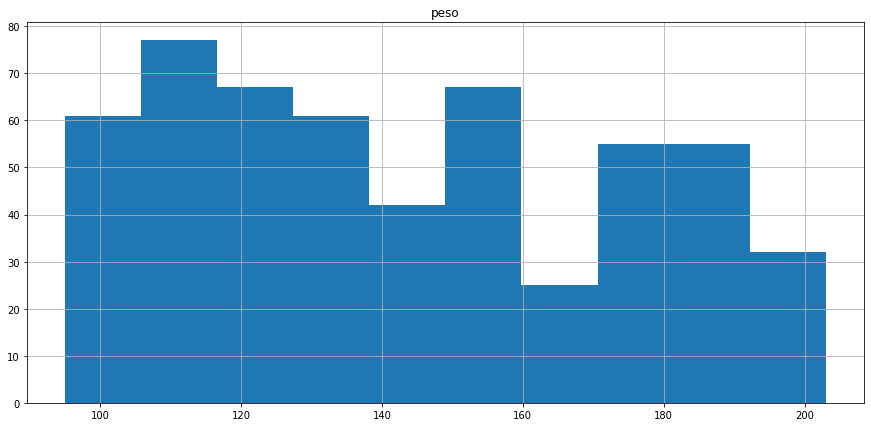

In [350]:
clientes.hist(column='peso', figsize=(15, 7))
plt.show()

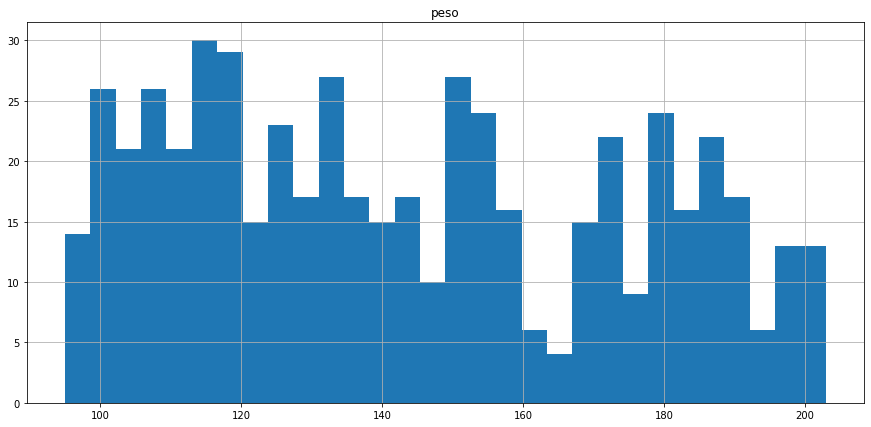

In [351]:
clientes.hist(column='peso', figsize=(15,7),bins=30)
plt.show()

array([[<AxesSubplot:title={'center':'colesterol'}>]], dtype=object)

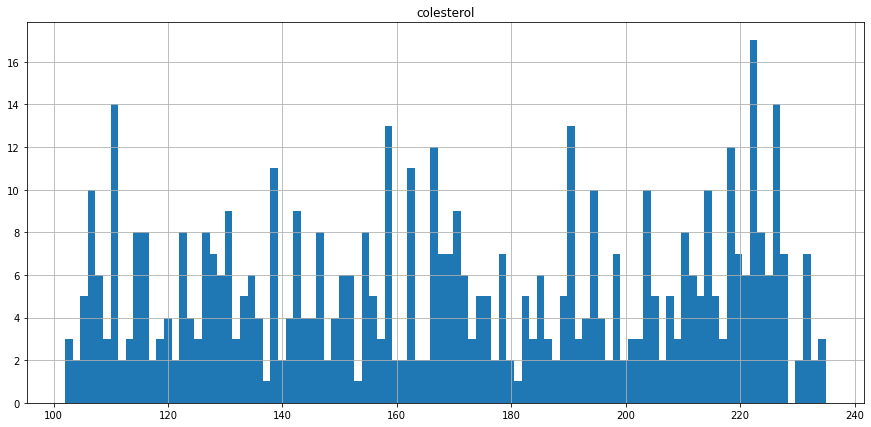

In [352]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)

In [353]:
# criando um identificador para a variável gênero

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [354]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<AxesSubplot:title={'center':'genero_number'}>]], dtype=object)

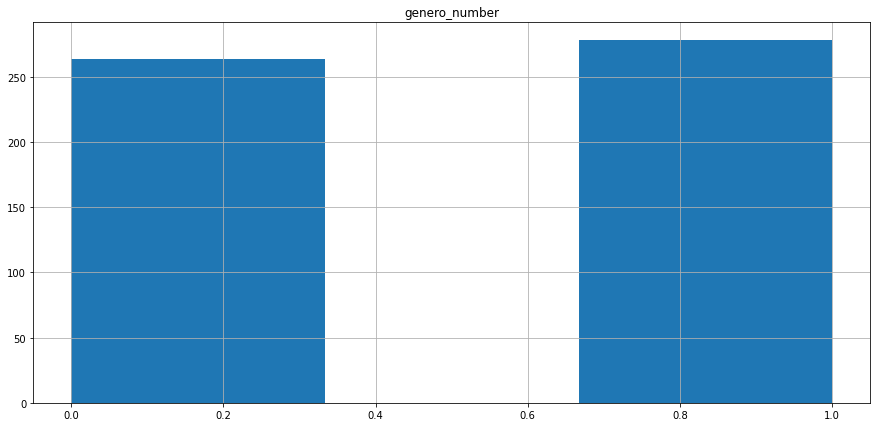

In [355]:
clientes.hist(column='genero_number', figsize=(15, 7), bins=3)

## junção de dados coletados

In [356]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [357]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [358]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [359]:
#realiza junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [360]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [361]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


## organizando a base de dados

In [362]:
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [363]:
#alterando as linhas da variavel sigla_estado
base_completa.sigla_estado.str.upper()

0      RR
17     DF
39     AM
64     SE
83     ES
       ..
418    RO
430    AC
155    CE
372    RN
100    ES
Name: sigla_estado, Length: 498, dtype: object

In [364]:
# inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [365]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


## alterando disposição das colunas do arquivo de dados

In [366]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
17,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
39,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
64,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
83,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
430,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
155,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
372,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [367]:
base_completa = base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']].reset_index(drop=True)

In [368]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


## analise dos dados

In [369]:
from sklearn.cluster import KMeans

In [370]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters= k)
        kmeans.fit(X=dados_cliente)
        wcss.append(kmeans.inertia_)
    return wcss

In [371]:
dados_cliente = base_completa[['peso', 'colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227


In [372]:
wcss_clientes = calcular_wcss(dados_cliente)

In [373]:
for i in range(len(wcss_clientes)):
    print(f' O cluster {i} possui valor wcss de: {wcss_clientes[i]}')

 O cluster 0 possui valor wcss de: 1248240.6686746986
 O cluster 1 possui valor wcss de: 298948.2448183639
 O cluster 2 possui valor wcss de: 127847.61956819553
 O cluster 3 possui valor wcss de: 73826.33539515288
 O cluster 4 possui valor wcss de: 49171.99371754595
 O cluster 5 possui valor wcss de: 34064.500021008374
 O cluster 6 possui valor wcss de: 25083.602386011884
 O cluster 7 possui valor wcss de: 20390.63054970707
 O cluster 8 possui valor wcss de: 15953.354039948881
 O cluster 9 possui valor wcss de: 13428.373033557806


## visualizando grafico cotovelo

In [374]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [375]:
grafico_wcss = px.line( x = range(1, 11), y= wcss_clientes)

fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS', xaxis_title= 'Número de clusters', yaxis_title= 'Valor do WCSS', template = 'plotly_white')

fig.show()

In [376]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [377]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0
...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1


## calculando centroide

In [378]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [380]:
grafico = px.scatter(x = base_completa['peso'], y= base_completa['colesterol'], color = base_completa['cluster'])

grafico_centroide = px.scatter()
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

## visualizando e alterando layout do grafico

In [381]:
grafico = px.scatter(x = base_completa['peso'], y= base_completa['colesterol'], color = base_completa['cluster'])

fig = go.Figure(grafico)
fig.update_layout(title='Analise de clusters', xaxis_title= 'Colesterol', yaxis_title= 'peso')
fig.show()

In [382]:
def plotar_grafico(x, y, xlabel, ylabel):
    grafico = px.scatter(x = x, y= y, color = base_completa['cluster'])

    fig = go.Figure(grafico)

    fig.update_layout(title='Analise de clusters', xaxis_title= xlabel, yaxis_title= ylabel)
    fig.show()

In [383]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [384]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [385]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

## segmentando os clientes com base nos clusters

In [386]:
# Alto risco: peso e colesterol altos
# baixo risco: baixo peso e colesterol baixo
# Risco moderado: peso e colesterol medianos

x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

In [387]:
cluster_clientes = base_completa

In [395]:
#segmentando clientes com base nos clusters
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Risco Moderado Baixo'
cluster_clientes.loc[cluster_clientes['cluster']==3, 'nome_cluster'] = 'Risco Moderado Alto'
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Alto Risco'


In [396]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2,Baixo Risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1,Risco Moderado Baixo
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,Alto Risco
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1,Risco Moderado Baixo
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2,Baixo Risco
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,Risco Moderado Baixo


## Analise dos clusters criados

In [400]:
# verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo Risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
Risco Moderado Alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado Baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


In [402]:
# verifica os valores de estados por cluster
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()


,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,218.985915,8.086400,204.0,213.00,220.0,225.0,235.0
Baixo Risco,129.0,119.573643,10.292424,102.0,110.00,120.0,129.0,138.0
Risco Moderado Alto,106.0,186.037736,9.760879,168.0,177.25,187.5,194.0,203.0
Risco Moderado Baixo,121.0,154.206612,9.776602,138.0,146.00,155.0,163.0,171.0


In [408]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Rio Grande do Sul"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
63,69,Feminino,35,187.0,221,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
97,106,Masculino,56,179.0,216,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
235,261,Masculino,34,171.0,205,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
282,313,Masculino,33,169.0,204,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
304,335,Masculino,68,182.0,222,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
340,373,Feminino,38,194.0,224,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
341,374,Masculino,18,177.0,214,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
342,376,Masculino,50,172.0,205,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
365,403,Feminino,45,175.0,215,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco
370,409,Masculino,19,180.0,219,21,Rio Grande do Sul,RS,Brasil,0,Alto Risco


In [403]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()


count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    60.0  220.650000   6.456701  204.0  216.75   
                     Masculino   82.0  217.768293   8.939162  204.0  211.00   
Baixo Risco          Feminino    58.0  122.448276  10.372319  102.0  113.00   
                     Masculino   71.0  117.225352   9.677953  102.0  109.00   
Risco Moderado Alto  Feminino    59.0  186.152542  10.182496  168.0  176.00   
                     Masculino   47.0  185.893617   9.311596  172.0  178.00   
Risco Moderado Baixo Feminino    63.0  156.571429   9.596226  138.0  149.00   
                     Masculino   58.0  151.637931   9.389614  138.0  143.25   

                                  50%    75%    max  
nome_cluster         genero                          
Alto Risco           Feminino   221.0  225.0  235.0  
                     Masculino  219.0  225.0  235.0  
Baixo Risco          Feminino   124.5  130.0  138.0  
                     Masculino  115.0  126.0  136.0  
Risco Moderado Alto  Feminino   189.0  194.5  201.0  
                     Masculino  184.0  192.5  203.0  
Risco Moderado Baixo Feminino   156.0  166.0  171.0  
                     Masculino  151.5  158.0  168.0

## exportando dados

In [404]:
cluster_clientes.head()

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2,Baixo Risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1,Risco Moderado Baixo
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,Alto Risco


In [405]:
cluster_clientes.to_csv('classificacao_clientes.csv', sep=';', encoding='latin1')